<h1>Der Datensatz - Ten Thousand German News Articles Dataset (10kGNAD) </h1>

<h2>Exploration des Datensatzes</h2>

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt

<h4>Einlesen des Datensatzes</h4>

In [2]:
corpus = pd.read_csv("articles.csv", sep=";", header=None, error_bad_lines=False, warn_bad_lines=False, names=["category", "text"])
corpus.head()

,category,text
0,Etat,"Die ARD-Tochter Degeto hat sich verpflichtet, ..."
1,Etat,App sei nicht so angenommen worden wie geplant...
2,Etat,"'Zum Welttag der Suizidprävention ist es Zeit,..."
3,Etat,Mitarbeiter überreichten Eigentümervertretern ...
4,Etat,Service: Jobwechsel in der Kommunikationsbranc...


<h4>Anzahl der Artikel im Datensatz</h4>

In [3]:
print(corpus.shape[0])

10273


In [10]:
corpus[corpus["text"].str.contains("Pizza")]

,category,text
1443,Inland,Maria Vassilakou informiert sich am Wiener Wes...
3638,Kultur,'Lemmy Kilmister war der letzte große Unbelehr...
6101,Sport,'Gaston Glock senior hat seiner Frau Kathrin i...
6247,Sport,Mit extremem Schlafentzug strampelte Rookie Se...
6631,Web,Laut schwedischer Zeitung – Nutzt Bekanntheit ...
7332,Web,Süßes und Fast-Food dominieren quantitativ – S...
7801,Web,"Die ""Washington Post"" kürte die ""meistgehasste..."
7907,Web,Bereits nach wenigen tausend Klicks wurden die...
8195,Web,Der Online-Handel ist aus unserem Leben nicht ...
9510,Wirtschaft,Mit der Registrierkassenpflicht wird es ernst:...


<h4>Anzahl der Kategorien</h4>

In [4]:
print(len(corpus["category"].unique())) 

9


<h4>Namen der Kategorien</h4>

In [5]:
categories=list(corpus["category"].unique())

categories2 = corpus["category"].drop_duplicates().tolist()
categories2

['Etat',
 'Inland',
 'International',
 'Kultur',
 'Panorama',
 'Sport',
 'Web',
 'Wirtschaft',
 'Wissenschaft']

<h4>Anzahl der Artikel pro Kategorie</h4>

In [6]:
cat_len ={i: len(corpus[corpus["category"]==i]) for i in categories}
cat_len

{'Etat': 668,
 'Inland': 1015,
 'International': 1511,
 'Kultur': 539,
 'Panorama': 1678,
 'Sport': 1201,
 'Web': 1677,
 'Wirtschaft': 1411,
 'Wissenschaft': 573}

<h4>Verteilung der Artikel pro Kategorie</h4>

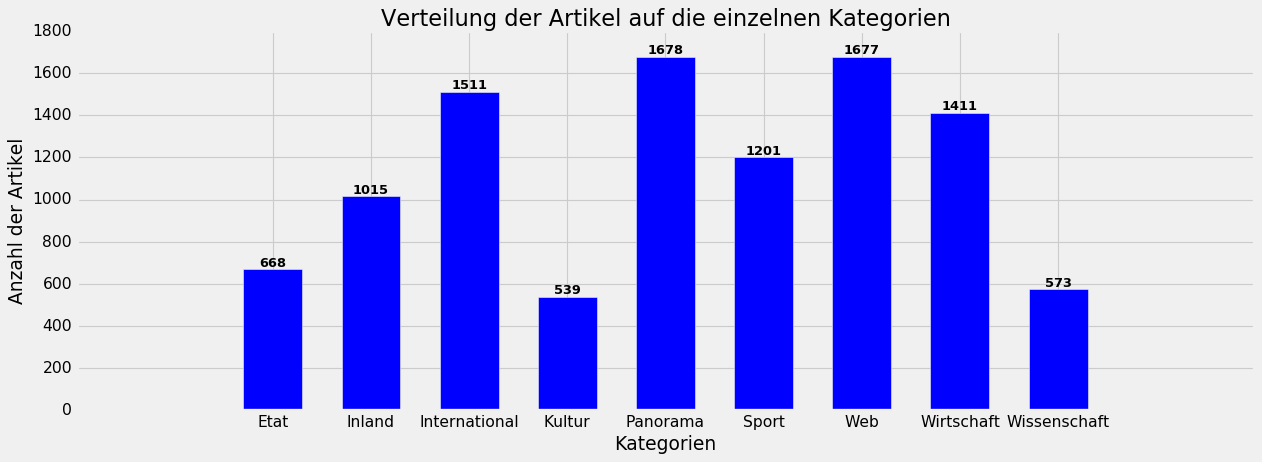

In [10]:
plt.figure(figsize=[16,6])
plt.style.use("seaborn-muted")
x_indexes=np.arange(len(categories))
plt.bar(x_indexes, cat_len.values(), label="Kategorien", width=0.6, color="b")
plt.xticks(ticks=x_indexes, labels=cat_len.keys())
plt.xlabel("Kategorien")
plt.ylabel("Anzahl der Artikel")
plt.title("Verteilung der Artikel auf die einzelnen Kategorien")
plt.tight_layout()

for i, j in zip(x_indexes, cat_len.values()):
       plt.annotate(j, xy=(i,j), xycoords="data", verticalalignment="bottom", horizontalalignment="center", fontweight="demi", fontsize="small")

plt.savefig("Datensatz_Abbildungen/Abb1_Verteilung_Art.zahl_Kat.jpg")
plt.show()

<h4>Länge der Artikel (Anzahl der Zeichen)</h4>

In [11]:
#Hinzufügen der Spalte "length"
corpus["length"] = pd.Series({i: len(corpus.iloc[i, 1]) for i in corpus.index})
corpus.head()

,category,text,length
0,Etat,"Die ARD-Tochter Degeto hat sich verpflichtet, ...",1029
1,Etat,App sei nicht so angenommen worden wie geplant...,277
2,Etat,"'Zum Welttag der Suizidprävention ist es Zeit,...",5741
3,Etat,Mitarbeiter überreichten Eigentümervertretern ...,1971
4,Etat,Service: Jobwechsel in der Kommunikationsbranc...,2055


<h4>Länge der kürzesten bzw. längsten Artikel pro Kategorie (Anzahl der Zeichen)</h4>

In [12]:
min_max_length = pd.DataFrame(index=categories, columns=["min", "max"])
for i in min_max_length.index:
    min_max_length.loc[i, "min"]=corpus[corpus["category"]==i]["length"].min()
    min_max_length.loc[i, "max"]=corpus[corpus["category"]==i]["length"].max()
min_max_length

,min,max
Etat,88,17305
Inland,47,14949
International,49,14123
Kultur,52,15294
Panorama,79,12823
Sport,25,15455
Web,34,32600
Wirtschaft,86,13714
Wissenschaft,122,12905


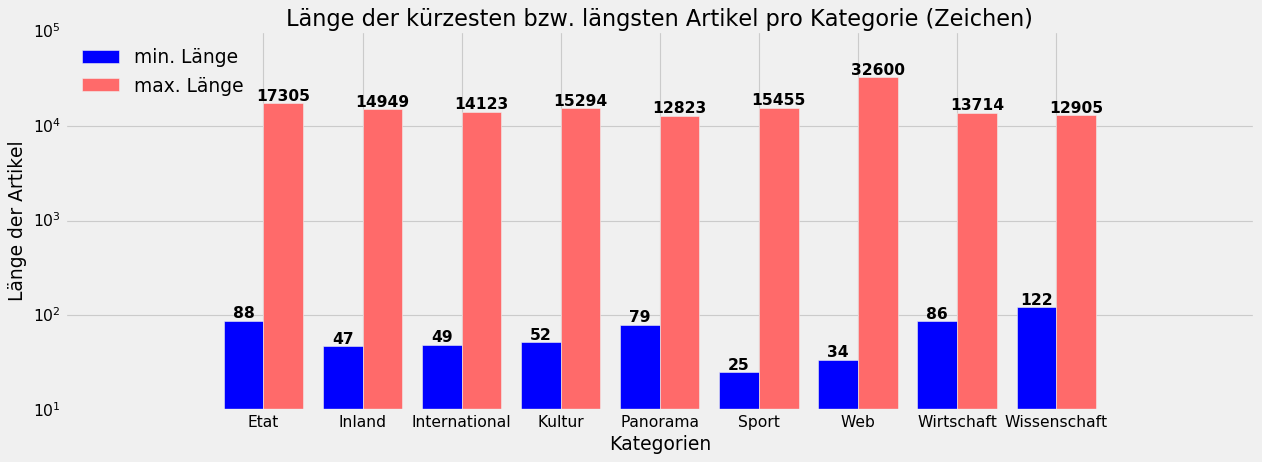

In [16]:
#Verteilung der minimalen und maximalen Artikellängen pro Kategorie (Zeichenebene)
plt.figure(figsize=[16, 6])
plt.style.use("seaborn-muted")
x_indexes=np.arange(len(categories))
width=0.4
plt.bar(x_indexes-(width/2), min_max_length["min"], label="min. Länge", width=width, color="b" )
plt.bar(x_indexes+(width/2), min_max_length["max"], label="max. Länge", width=width, color="#FF6A6A" )
plt.xticks(ticks=x_indexes, labels=min_max_length.index)
plt.yscale("log") 
plt.xlabel("Kategorien")
plt.ylabel("Länge der Artikel")
plt.title("Länge der kürzesten bzw. längsten Artikel pro Kategorie (Zeichen)")
plt.tight_layout()
plt.legend(loc="upper left")

for i, j in zip(x_indexes, min_max_length["min"]):
       plt.annotate(j, xy=(i-(width/2),j), xycoords="data", verticalalignment="bottom", horizontalalignment="center", fontweight="demi", fontsize="medium")

for i, j in zip(x_indexes, min_max_length["max"]):
       plt.annotate(j, xy=(i+(width/2),j), xycoords="data", verticalalignment="bottom", horizontalalignment="center", fontweight="demi", fontsize="medium")

plt.savefig("Datensatz_Abbildungen/Abb2_min_max_GesamtlaengenZeichen.jpg")
plt.show()

<h4>Länge der einzelnen Kategorien (Anzahl der Zeichen)</h4>

In [17]:
#Erstellung eines Bigdocs 
def bigdoc_c(D, c):
    bigdoc = D[D["category"]==c]["text"].str.cat(sep=" ")
    return bigdoc

bigdoc_cor = pd.Series({i: bigdoc_c(corpus, i) for i in categories})
bigdoc_cor_df = pd.DataFrame(bigdoc_cor, columns=["text"]) 

bigdoc_cor_df["length"] = pd.Series({i: len(bigdoc_cor_df.loc[i, "text"]) for i in bigdoc_cor_df.index})
bigdoc_cor_df.head()

,text,length
Etat,"Die ARD-Tochter Degeto hat sich verpflichtet, ...",1485019
Inland,Museums-Experten rechnen mit 25 bis 60 Million...,3212487
International,Das Verhältnis zu Russland war eines der domin...,3266326
Kultur,Deutscher Maler und der estnischer Komponist p...,1402086
Panorama,Ein geschenkter Moment von Zeit zu Zeit. Wenn ...,4213316


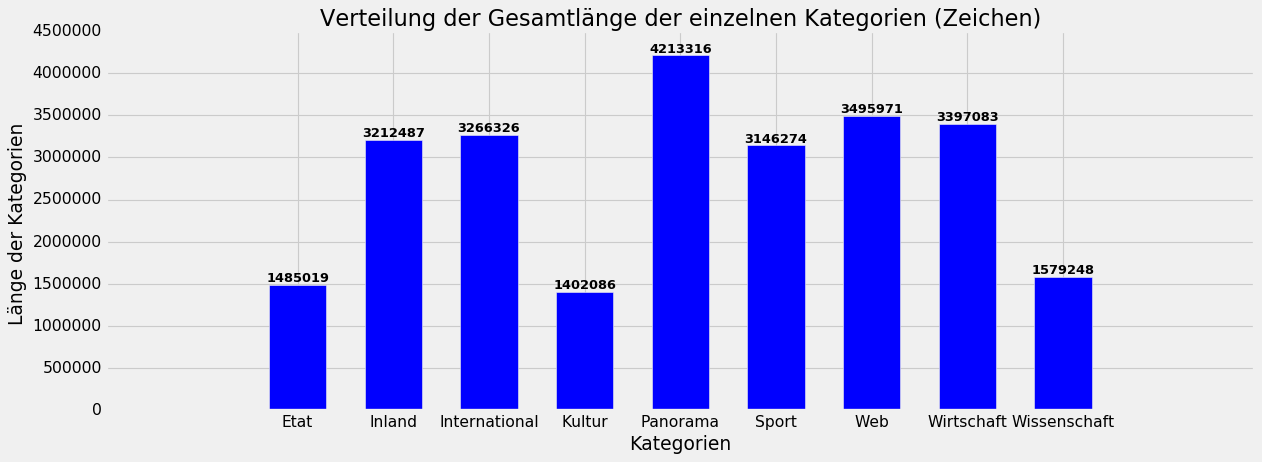

In [21]:
#Längenverhältnisse der Kategorien (Zeichenebene)
plt.figure(figsize=[16,6])
plt.style.use("seaborn-muted")
x_indexes=np.arange(len(categories))
plt.bar(x_indexes, bigdoc_cor_df["length"], label="Kategorien", width=0.6, color="b")
plt.xticks(ticks=x_indexes, labels=bigdoc_cor_df.index)
plt.xlabel("Kategorien")
plt.ylabel("Länge der Kategorien ")
plt.title("Verteilung der Gesamtlänge der einzelnen Kategorien (Zeichen)")
plt.tight_layout()

for i, j in zip(x_indexes, bigdoc_cor_df["length"]):
       plt.annotate(j, xy=(i,j), xycoords="data", verticalalignment="bottom", horizontalalignment="center", fontweight="demi", fontsize="small")

plt.savefig("Datensatz_Abbildungen/Abb3_Gesamtlaengen_Kategorien.jpg", format="jpg")
plt.show()

<h4>Länge der Artikel (Anzahl der Wörter/Zahlen)</h4>

In [7]:
#Hinzufügen der Spalte "words"
corpus_words = corpus.copy()
corpus_words["words"] = corpus_words["text"].str.count(r"\w+")
corpus_words.head()

,category,text,words
0,Etat,"Die ARD-Tochter Degeto hat sich verpflichtet, ...",142
1,Etat,App sei nicht so angenommen worden wie geplant...,47
2,Etat,"'Zum Welttag der Suizidprävention ist es Zeit,...",812
3,Etat,Mitarbeiter überreichten Eigentümervertretern ...,253
4,Etat,Service: Jobwechsel in der Kommunikationsbranc...,299


<h4>Länge der kürzesten bzw. längsten Artikel pro Kategorie (Anzahl der Wörter/Zahlen)</h4>

In [8]:
min_max_words = pd.DataFrame(index=categories, columns=["min", "max"])
for i in min_max_words.index:
    min_max_words.loc[i, "min"]=corpus_words[corpus_words["category"]==i]["words"].min()
    min_max_words.loc[i, "max"]=corpus_words[corpus_words["category"]==i]["words"].max()
min_max_words

,min,max
Etat,16,2565
Inland,4,2232
International,9,2014
Kultur,8,2382
Panorama,10,1891
Sport,3,2412
Web,4,4935
Wirtschaft,13,1941
Wissenschaft,20,1864


In [9]:
#Ausgabe der Artikel mit 3 bzw. 4 Wörtern
print("Sport, 3 Wörter:")
print(corpus_words.text.loc[(corpus_words["category"]=="Sport") & (corpus_words["words"]==3)], "\n")

print("Inland, 4 Wörter:")
print(corpus_words.text.loc[(corpus_words["category"]=="Inland") & (corpus_words["words"]==4)], "\n")

print("Web, 4 Wörter:")
print(corpus_words.text.loc[(corpus_words["category"]=="Web") & (corpus_words["words"]==4)], "\n")

Sport, 3 Wörter:
5676    PORTUGAL: UNGARN: ISLAND:
Name: text, dtype: object 

Inland, 4 Wörter:
1509    Vorläufiges Endergebnis mit Mandatsverteilung. 
Name: text, dtype: object 

Web, 4 Wörter:
8013    Nationale IMEI-Sperre angestrebt. 
Name: text, dtype: object 



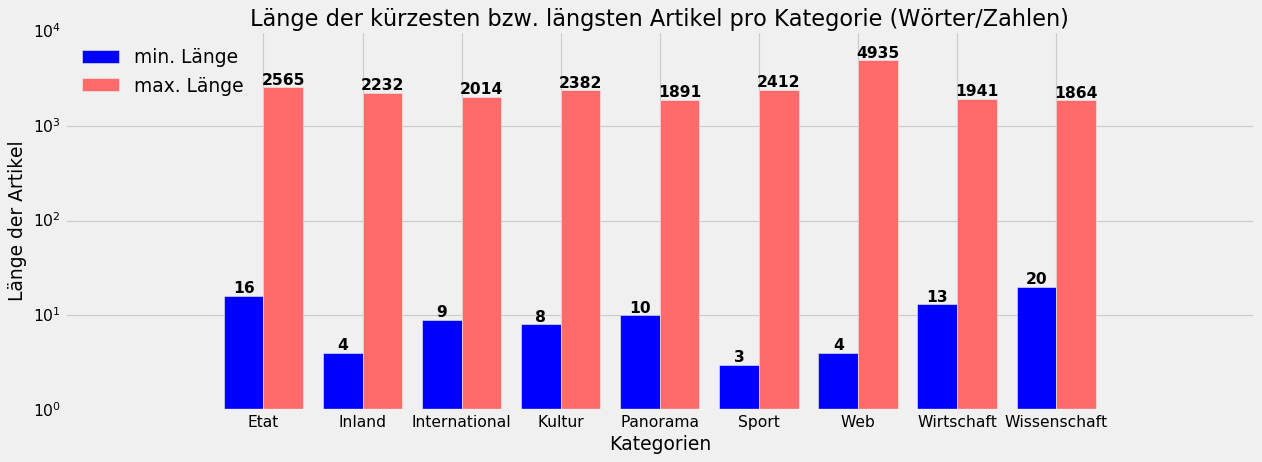

In [28]:
#Verteilung der minimalen und maximalen Artikellängen pro Kategorie (Wortebene)
plt.figure(figsize=[16, 6])
plt.style.use("seaborn-muted")
x_indexes=np.arange(len(categories))
width=0.4
plt.bar(x_indexes-(width/2), min_max_words["min"], label="min. Länge", width=width, color="b" )
plt.bar(x_indexes+(width/2), min_max_words["max"], label="max. Länge", width=width, color="#FF6A6A" )
plt.xticks(ticks=x_indexes, labels=min_max_words.index)
plt.yscale("log") 
plt.xlabel("Kategorien")
plt.ylabel("Länge der Artikel")
plt.title("Länge der kürzesten bzw. längsten Artikel pro Kategorie (Wörter/Zahlen)")
plt.tight_layout()
plt.legend(loc="upper left")

for i, j in zip(x_indexes, min_max_words["min"]):
       plt.annotate(j, xy=(i-(width/2),j), xycoords="data", verticalalignment="bottom", horizontalalignment="center", fontweight="demi", fontsize="medium")

for i, j in zip(x_indexes, min_max_words["max"]):
       plt.annotate(j, xy=(i+(width/2),j), xycoords="data", verticalalignment="bottom", horizontalalignment="center", fontweight="demi", fontsize="medium")

plt.savefig("Datensatz_Abbildungen/Abb4_min_max_WoerterZahlen.jpg")
plt.show()

<h4>Länge der einzelnen Kategorien (Wörter/Zahlen)</h4>

In [29]:
sum_words = {i: sum(corpus_words[corpus_words["category"]==i].words) for i in categories}
sum_words

{'Etat': 214637,
 'Inland': 450803,
 'International': 456732,
 'Kultur': 203751,
 'Panorama': 595472,
 'Sport': 478457,
 'Web': 503701,
 'Wirtschaft': 476944,
 'Wissenschaft': 218793}

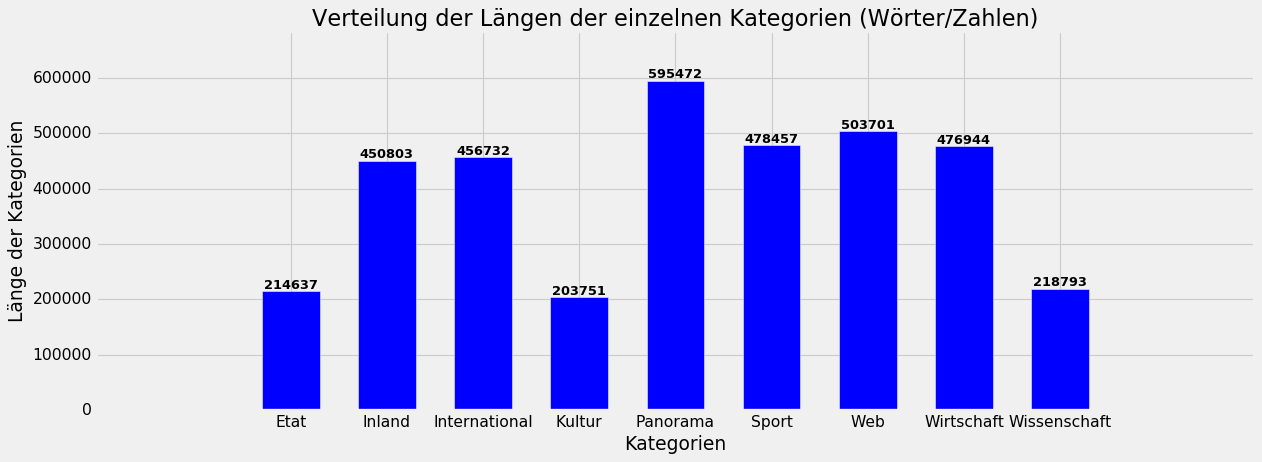

In [32]:
#Darstellung der Längenverhältnisse der Kategorien (Wortebene)
plt.figure(figsize=[16,6])
plt.style.use("seaborn-muted")
x_indexes=np.arange(len(categories))
plt.bar(x_indexes, sum_words.values(), label="Kategorien", width=0.6, color="b")
plt.xticks(ticks=x_indexes, labels=sum_words.keys())
plt.xlabel("Kategorien")
plt.ylabel("Länge der Kategorien")
plt.title("Verteilung der Längen der einzelnen Kategorien (Wörter/Zahlen)")
plt.tight_layout()
plt.margins(0.2, 0.15)

for i, j in zip(x_indexes, sum_words.values()):
       plt.annotate(j, xy=(i,j), xycoords="data", verticalalignment="bottom", horizontalalignment="center", fontweight="demi", fontsize="small")

plt.savefig("Datensatz_Abbildungen/Abb5_Gesamtlaengen_Woerter_Zahlen.jpg")
plt.show()

<h4>Durchschnittliche Artikellängen der Kategorien (Wörter/Zahlen)</h4>

In [10]:
#Durchschnittslänge der Artikel der Kategorien - Wörter/Zahlen (gerundet auf 2 Nachkommastellen)

mean_words = {i: round(corpus_words[corpus_words["category"]==i].words.mean(), 2) for i in categories}
mean_words

{'Etat': 321.31,
 'Inland': 444.14,
 'International': 302.27,
 'Kultur': 378.02,
 'Panorama': 354.87,
 'Sport': 398.38,
 'Web': 300.36,
 'Wirtschaft': 338.02,
 'Wissenschaft': 381.84}

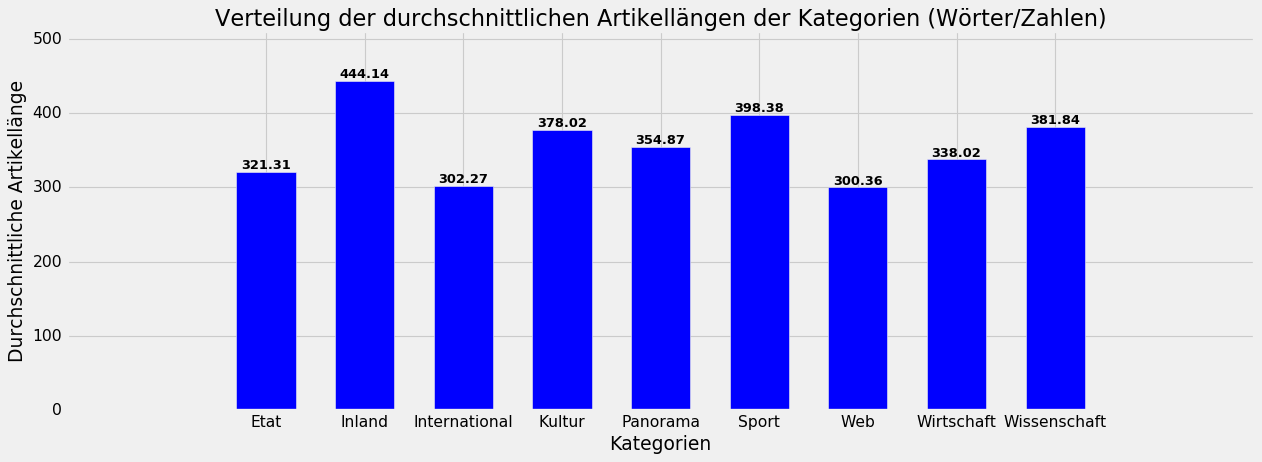

In [16]:
#Darstellung der Verteilung der durchschnittlichen Artikellängen der Kategorien (Wörter/Zahlen)

plt.figure(figsize=[16,6])
plt.style.use("seaborn-muted")
x_indexes=np.arange(len(categories))
plt.bar(x_indexes, mean_words.values(), label="Kategorien", width=0.6, color="b")
plt.xticks(ticks=x_indexes, labels=mean_words.keys())
plt.xlabel("Kategorien")
plt.ylabel("Durchschnittliche Artikellänge")
plt.title("Verteilung der durchschnittlichen Artikellängen der Kategorien (Wörter/Zahlen)")
plt.tight_layout()
plt.margins(0.2, 0.15)

#Annotationen
for i, j in zip(x_indexes, mean_words.values()):
       plt.annotate(j, xy=(i,j), xycoords="data", verticalalignment="bottom", horizontalalignment="center", fontweight="demi", fontsize="small")

plt.savefig("Datensatz_Abbildungen/Abb8_Durchschnitt_Artikellaengen.jpg")
plt.show()

<h4>Verteilung der Artikellängen im Korpus</h4>

In [17]:
#Median der Artikellängen des Korpus
median_corpus = corpus_words["words"].median()
median_corpus

284.0

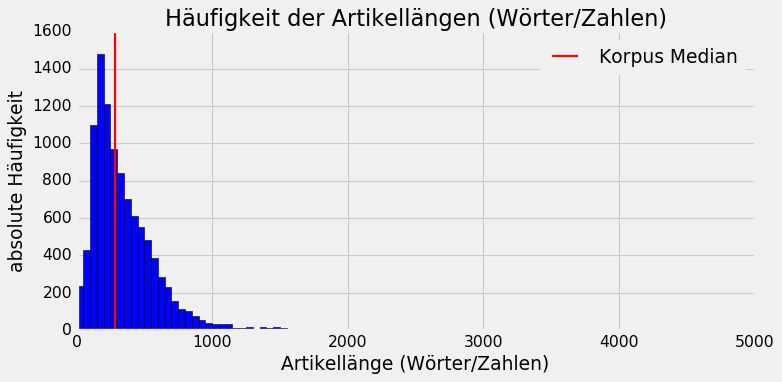

In [19]:
#Verteilung der Artikellängen im gesamten Korpus

plt.style.use("seaborn-muted")
steps = range(0,5000, 50)
plt.figure(figsize=(10,5))
plt.hist(corpus_words.words, bins=steps, edgecolor="black", color="b")
plt.xlabel("Artikellänge (Wörter/Zahlen)")
plt.ylabel("absolute Häufigkeit")
plt.title("Häufigkeit der Artikellängen (Wörter/Zahlen)")
plt.axvline(median_corpus, color="red", label="Korpus Median", linewidth=2)
plt.tight_layout()

plt.legend()
plt.savefig("Datensatz_Abbildungen/Abb9_Häufigkeit_Artikellängen.jpg")
plt.show()